<a href="https://colab.research.google.com/github/gaberm/TSA/blob/master/TSA_Forecasting_Using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Forecasting - Air Passengers Time Series Analysis
Source: https://www.youtube.com/watch?v=e8Yw4alG16Q

In [0]:
"""Forecasting - TSA Decomposition.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/gist/gaberm/3fc1f7ca17ac640e456844437bb1161a/forecasting-tsa-decomposition.ipynb

## Forecasting - Principles & Practices
by Rob J Hyndman and George Athanasopoulos - Monash University, Australia

Current Progress - https://otexts.com/fpp2/ts-objects.html

Python Exercises:
https://github.com/mscharth/forecasting

Useful links

https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000

http://rstudio-pubs-static.s3.amazonaws.com/311446_08b00d63cc794e158b1f4763eb70d43a.html
"""

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
# %matplotlib inline

#get the data
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

#load the data
data = pd.read_csv('airline-passengers.csv')
print(data.head())

data.plot( title='Airline Passengers', colormap='jet')



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

# %matplotlib inline
rcParams['figure.figsize'] = 10, 6

In [0]:
dataset = data

#Parse strings to datetime type
dataset['Month'] = pd.to_datetime( dataset['Month'], infer_datetime_format = True)
indexedDataset = dataset.set_index(['Month'])

In [0]:
from datetime import datetime
indexedDataset.head(5)

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

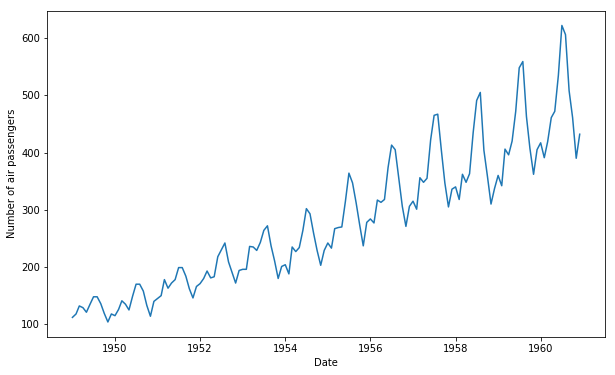

In [0]:
## Plot graph
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

In [0]:
## Determining rolling statsistics
# Rolling mean
rolmean = indexedDataset.rolling(window=12).mean()

# Rolling STD
rolstd = indexedDataset.rolling(window = 12).std()

# print(rolmean, rolstd)

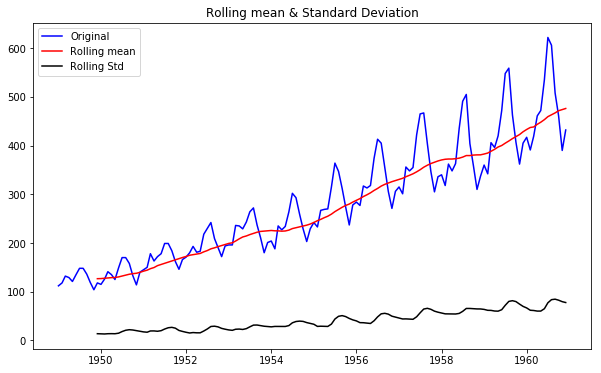

In [0]:
#Plotting rolling statistics
orig = plt.plot( indexedDataset, color='blue', label='Original')
mean = plt.plot( rolmean, color = 'red', label = "Rolling mean")
std = plt.plot( rolstd, color = 'black', label = "Rolling Std")

plt.legend(loc='best')
plt.title('Rolling mean & Standard Deviation')
plt.show(block=False)

In [0]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print( 'Results of Dickey-Fuller test:')
dftest = adfuller(indexedDataset['Passengers'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
 
print(dfoutput)

Results of Dickey-Fuller test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [0]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
  
  #Determining rolling stats
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()
  
  # Drop NA
  timeseries.dropna(inplace=True)
  #Plot rolling statistics
  orig = plt.plot( timeseries, color='blue', label='Original')
  mean = plt.plot( movingAverage, color = 'red', label = "Rolling mean")
  std = plt.plot( movingSTD, color = 'black', label = "Rolling Std")
  plt.legend(loc='best')
  plt.title('Rolling mean & Standard Deviation')
  plt.show(block=False)
  
  #Perform Dickery-Fuller test
  print( 'Results of Dickey-Fuller test:')
  dftest = adfuller(timeseries['Passengers'], autolag = 'AIC')

  dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

  print(dfoutput)

In [0]:
## Normalizing the data
indexedDataset_logScale = np.log( indexedDataset)
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSYD = indexedDataset_logScale.rolling(window=12).std()

datasetLogScalMinusMA = indexedDataset_logScale - movingAverage

datasetLogScalMinusMA.dropna(inplace=True)
datasetLogScalMinusMA.head(15)

Passengers
Month                 
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965

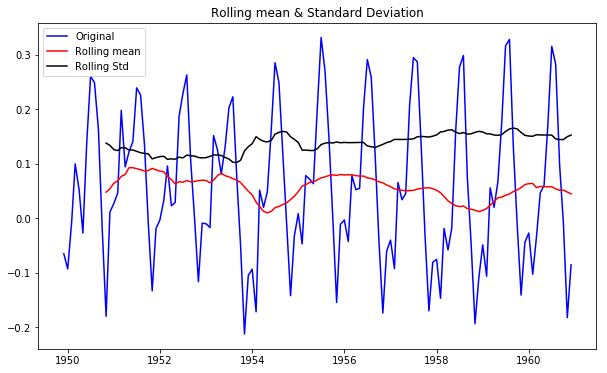

Results of Dickey-Fuller test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [0]:
test_stationary(datasetLogScalMinusMA)

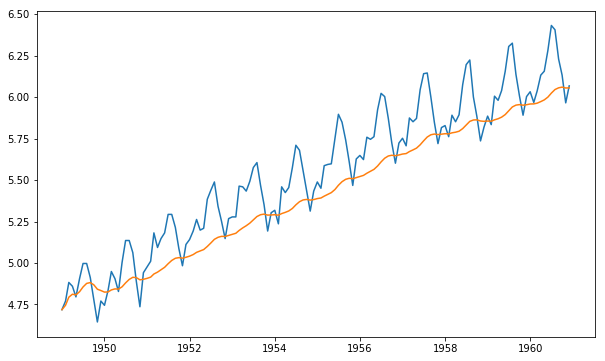

In [0]:
# WeightedAverage
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage)

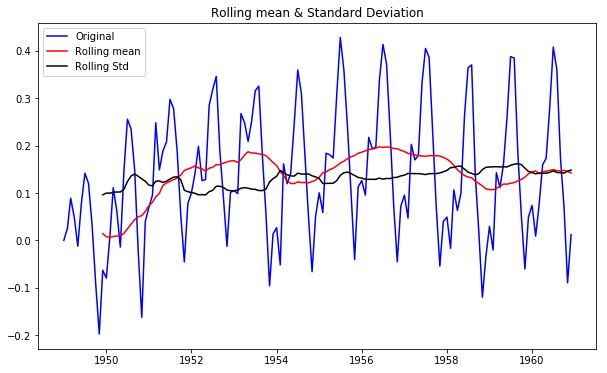

Results of Dickey-Fuller test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [0]:
datasetLogScaleMinuxMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage 
test_stationary(datasetLogScaleMinuxMovingExponentialDecayAverage)

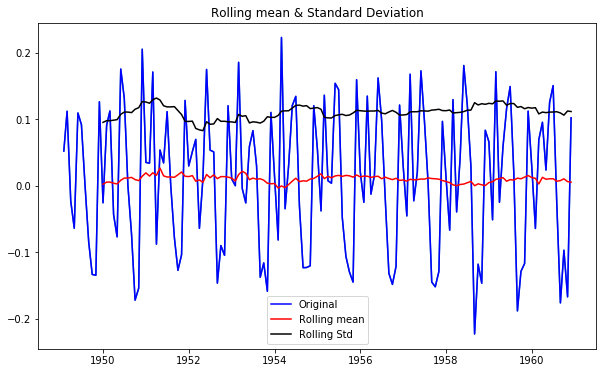

Results of Dickey-Fuller test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [0]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

test_stationary(datasetLogDiffShifting)

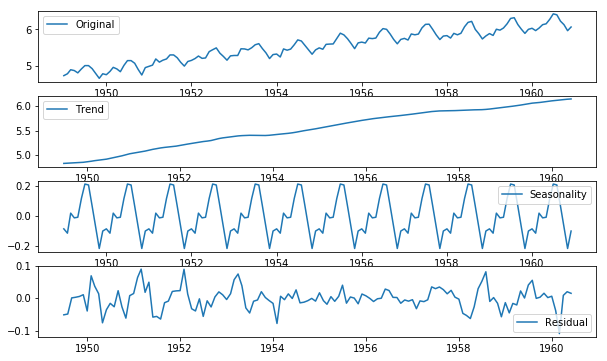

In [0]:
# Time series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')


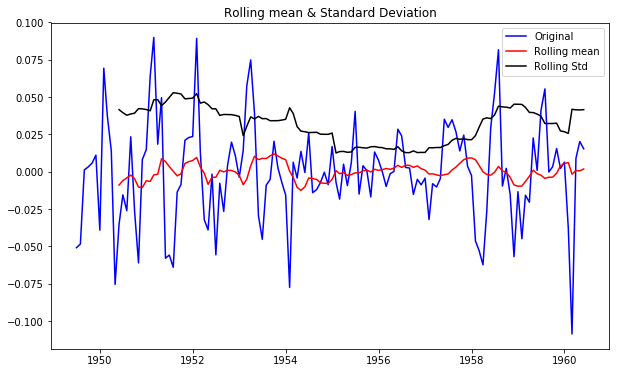

Results of Dickey-Fuller test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [0]:
decomposedLogData = residual
test_stationary(decomposedLogData)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


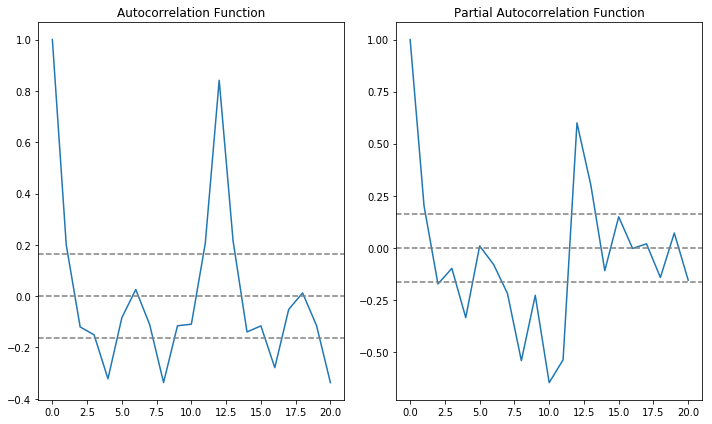

In [0]:
## Calculating ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags =20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method = 'ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

### statsmodels.tsa.arima_model.ARIMA
class *statsmodels.tsa.arima_model.ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')*[source]

Autoregressive Integrated Moving Average ARIMA(p,d,q) Model

**Parameters**

>**endog**: array-like 
>The endogenous variable.
>
>**order**: iterable
>
>The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use.
>
>**exog:** array-like, optional
>
>An optional array of exogenous variables. This should not include a constant or trend. You can specify this in the fit method.
>
>**dates:** array-like of datetime, optional
>
>An array-like object of datetime objects. If a pandas object is given for endog or exog, it is assumed to have a DateIndex.
>
>**freq:** str, optional
>
>The frequency of the time-series. A Pandas offset or ‘B’, ‘D’, ‘W’, ‘M’, ‘A’, or ‘Q’. This is optional if dates are given.



**Notes**

If exogenous variables are given, then the model that is fit is

ϕ(L)(yt−Xtβ)=θ(L)ϵt

where ϕ and θ are polynomials in the lag operator, L. This is the regression model with ARMA errors, or ARMAX model. This specification is used, whether or not the model is fit using conditional sum of square or maximum-likelihood, using the method argument in **statsmodels.tsa.arima_model.ARIMA.fit**. Therefore, for now, css and mle refer to estimation methods only. This may change for the case of the css model in future versions.


### Notes
in (p, d, q); d=1 , that will produce a non-stationary time series with a stochastic trending component.

more information here:

https://people.duke.edu/~rnau/411arim.htm


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


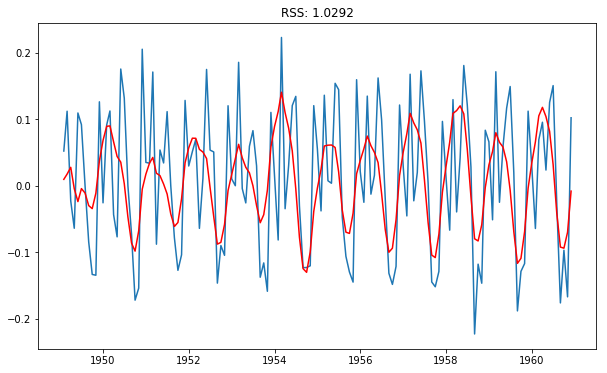

In [0]:
# MODELLING
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logScale, order = (2,1,2))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting['Passengers'])**2))
print('Plotting AR model')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


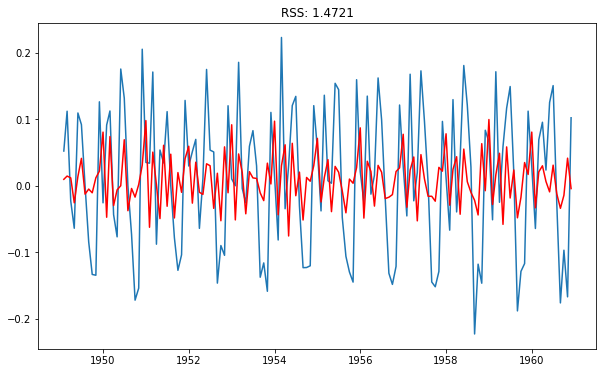

In [0]:
# MA Model
model = ARIMA(indexedDataset_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum ((results_MA.fittedvalues - datasetLogDiffShifting['Passengers'])**2))
print('Plotting AR Model')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


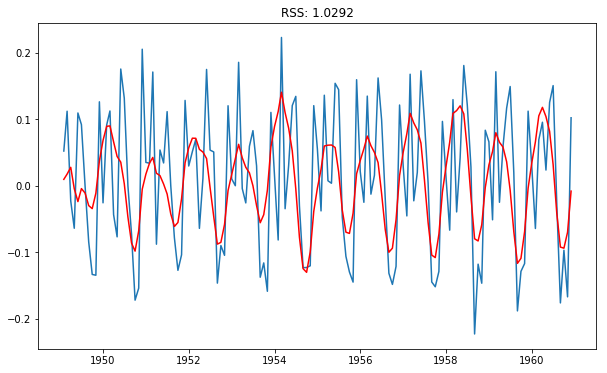

In [0]:
# ARIMA 

model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum ((results_ARIMA.fittedvalues - datasetLogDiffShifting['Passengers'])**2))
print('Plotting AR Model')

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64
Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


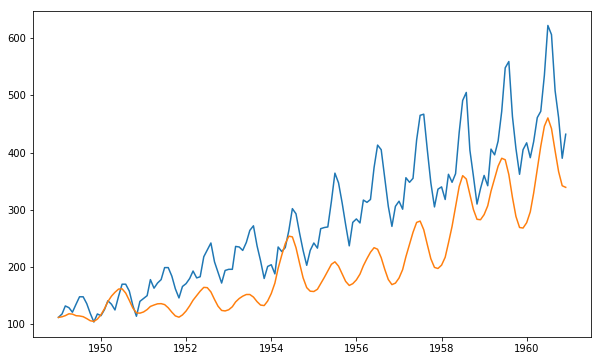

In [0]:
predications_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predications_ARIMA_diff.head())

#Conver to cumulative sum
predications_ARIMA_diff_cumsum = predications_ARIMA_diff.cumsum()
print(predications_ARIMA_diff_cumsum.head())

predications_ARIMA_log = pd.Series(indexedDataset_logScale['Passengers'].iloc[0], index = indexedDataset_logScale.index)
predications_ARIMA_log = predications_ARIMA_log.add(predications_ARIMA_diff_cumsum, fill_value=0)

predications_ARIMA_log.head()

predications_ARIMA = np.exp(predications_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predications_ARIMA)

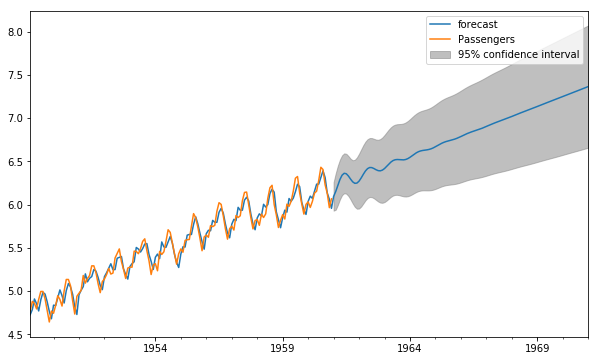

In [0]:
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps=120)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting Forecasts from ARIMA(2,0,1) with non-zero mean


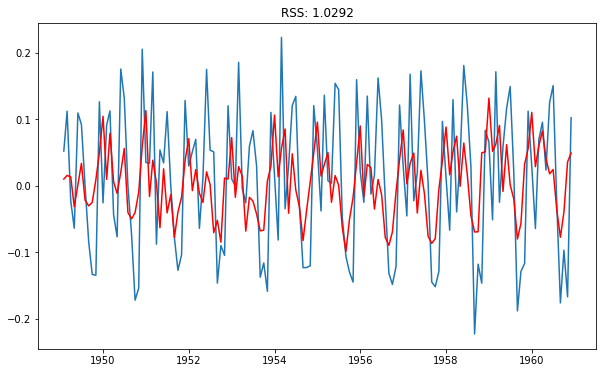

In [0]:
#Forecasts from ARIMA(1,1,2) with non-zero mean

model = ARIMA(indexedDataset_logScale, order = (1,1,2))
results_C1 = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_C1.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting['Passengers'])**2))
print("Plotting Forecasts from ARIMA(2,0,1) with non-zero mean")

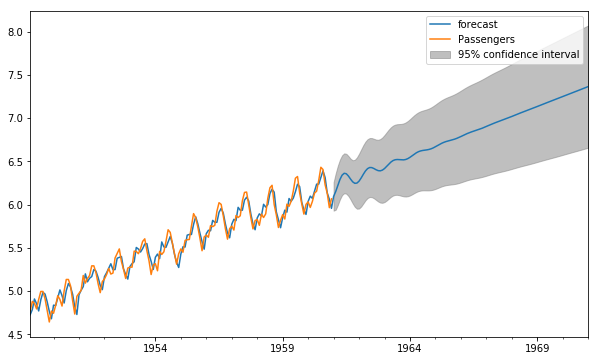

In [0]:
results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps=12)